In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.isnull().sum()
#no missing value present

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


EDA

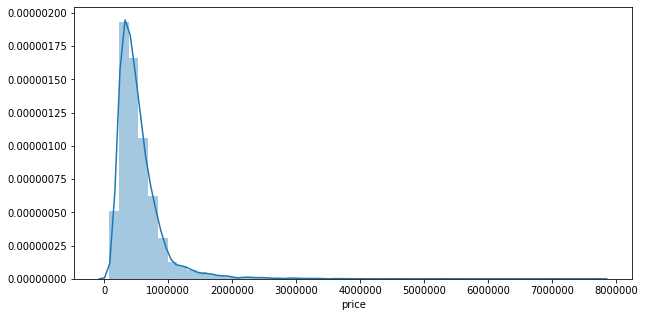

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(df['price'])

In [8]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [9]:
df.corr()['price'].sort_values()
#it shows price column is mostly correlated with sqft_living and grade features

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

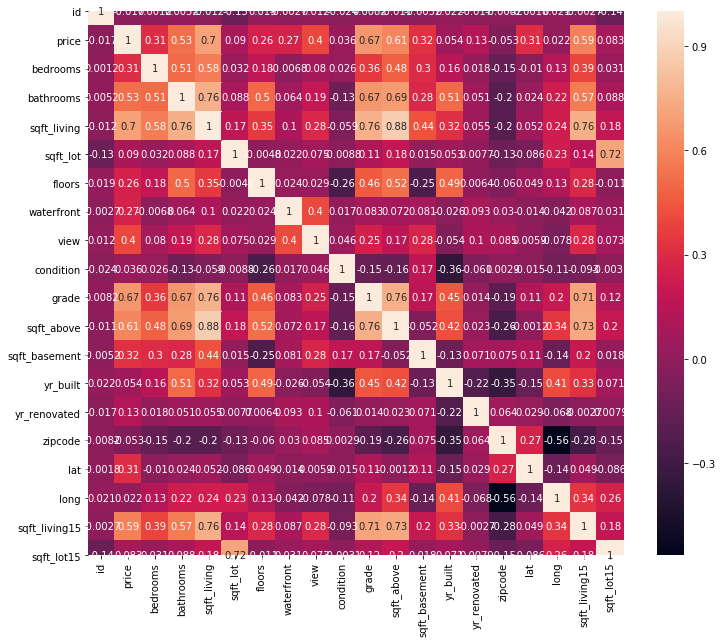

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

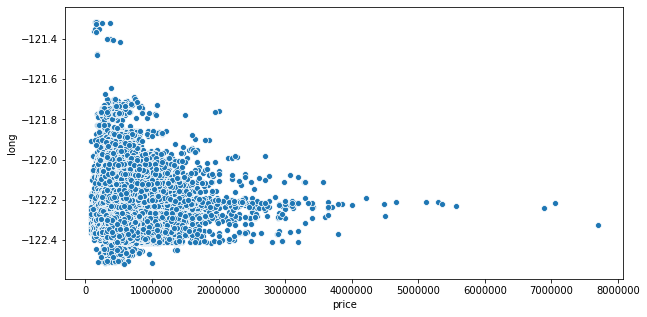

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='long',data=df)
#it shows long of -122.2 contains most expensive houses

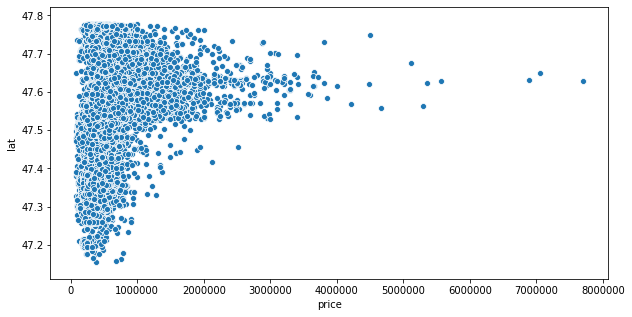

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='lat',data=df)
#it shows latitude of -47.6 contains most expensive houses

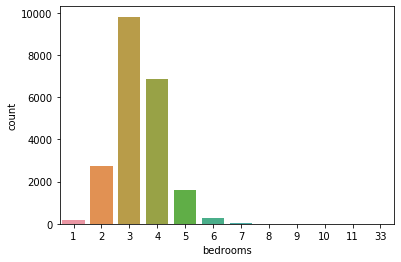

In [13]:
sns.countplot(df['bedrooms'])
#most bedrooms are from 2 to 5

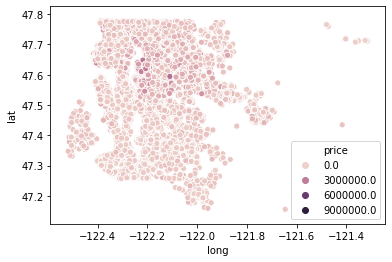

In [14]:
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [15]:
df['price'].sort_values(ascending=False)

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
           ...    
2139       82500.0
8267       82000.0
16184      81000.0
465        80000.0
15279      78000.0
Name: price, Length: 21597, dtype: float64

In [16]:
#removing outliers- removing top 1% of most expensive houses
len(df['price'])

21597

In [17]:
21597 * 0.01

215.97

In [18]:
df.sort_values('price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [19]:
top_non_1_per = df.sort_values('price',ascending=False).iloc[216:]

In [20]:
top_non_1_per

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


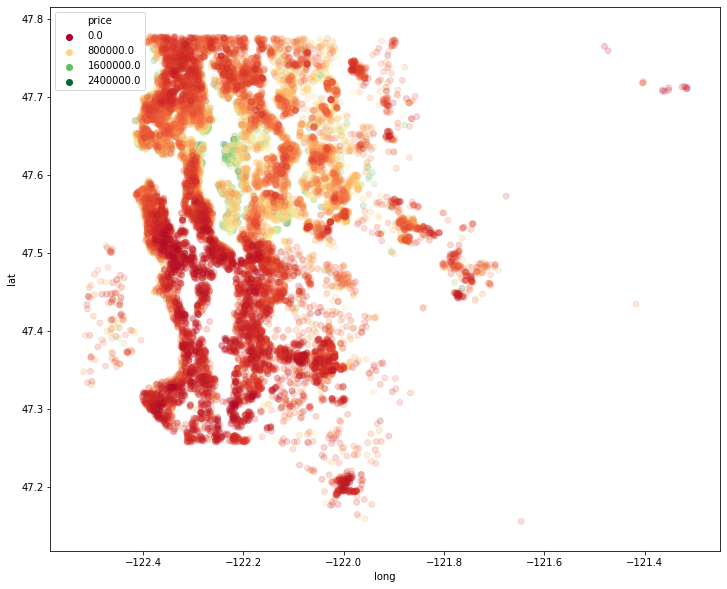

In [21]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='long',y='lat',data=top_non_1_per,hue='price',edgecolor=None,alpha=0.2,palette='RdYlGn')

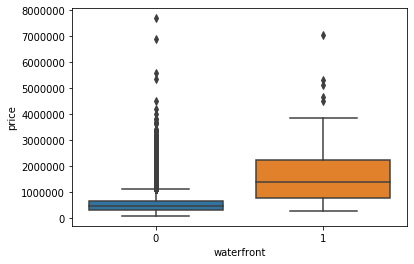

In [22]:
sns.boxplot(x='waterfront',y='price',data=df)

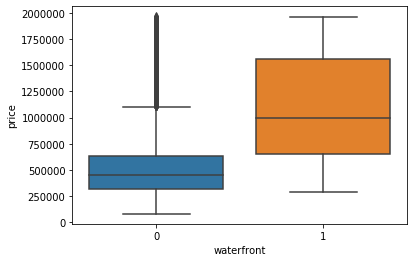

In [23]:
sns.boxplot(x='waterfront',y='price',data=top_non_1_per)
#black dots are outliers and in this case most outliers are removed

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.select_dtypes(include='object')

,date
0,10/13/2014
1,12/9/2014
2,2/25/2015
3,12/9/2014
4,2/18/2015
...,...
21592,5/21/2014
21593,2/23/2015
21594,6/23/2014
21595,1/16/2015


In [26]:
df.drop('id',axis=1,inplace=True)

In [27]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [30]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


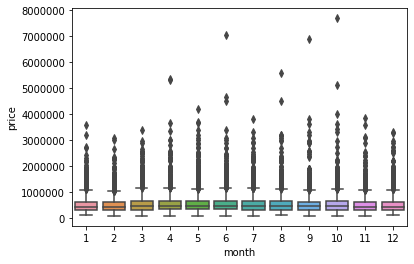

In [32]:
sns.boxplot(x='month',y='price',data=df)

In [33]:
df.groupby('month').mean()['price'].sort_values(ascending = False)


month
4     562215.615074
6     557534.318182
5     550849.746893
7     544892.161013
3     544057.683200
10    539439.447228
8     536655.212481
9     529723.517787
1     525963.251534
12    524799.902041
11    522359.903478
2     508520.051323
Name: price, dtype: float64

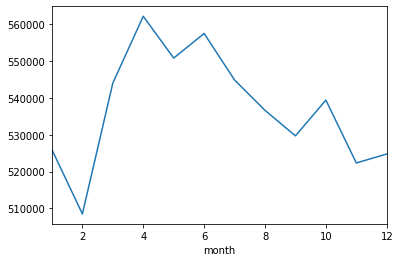

In [34]:
df.groupby('month').mean()['price'].plot()

In [35]:
df.drop('date',axis=1,inplace=True)

In [36]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [37]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
df.drop('zipcode',axis=1,inplace=True)

In [39]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [40]:
def bool_return(data):
    if data == 0:
        return 0
    else:
        return 1

In [41]:
df['yr_renovated_changed'] = df['yr_renovated'].apply(bool_return)

In [42]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,yr_renovated_changed
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,0


In [43]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [44]:
df['sqft_basement_changed'] = df['sqft_basement'].apply(bool_return)

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,yr_renovated_changed,sqft_basement_changed
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,47.5112,-122.257,1340,5650,2014,10,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,47.7210,-122.319,1690,7639,2014,12,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,47.7379,-122.233,2720,8062,2015,2,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,47.5208,-122.393,1360,5000,2014,12,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,47.6168,-122.045,1800,7503,2015,2,0,0


In [46]:
df.drop(['yr_renovated','sqft_basement'],axis=1,inplace=True)

In [47]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,yr_renovated_changed,sqft_basement_changed
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,47.5112,-122.257,1340,5650,2014,10,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,47.7210,-122.319,1690,7639,2014,12,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,47.7379,-122.233,2720,8062,2015,2,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,47.5208,-122.393,1360,5000,2014,12,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,47.6168,-122.045,1800,7503,2015,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,47.6993,-122.346,1530,1509,2014,5,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,47.5107,-122.362,1830,7200,2015,2,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,47.5944,-122.299,1020,2007,2014,6,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,47.5345,-122.069,1410,1287,2015,1,0,0


In [48]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [73]:
X_train.shape

(17277, 19)

In [74]:
y_train.shape

(17277,)

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
import joblib

In [192]:
joblib.dump(scaler,'scaler.sav')

['scaler.sav']

In [193]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

Model Building

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
model = Sequential()

In [80]:
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
early_stop = EarlyStopping(monitor='val_loss',patience=10,mode='min')

In [83]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),callbacks=[early_stop],epochs=400,batch_size=64)

Epoch 1/400
270/270 [==============================] - 1s 1ms/step - loss: 427319918592.0000 - val_loss: 409354108928.0000
Epoch 2/400
270/270 [==============================] - 0s 966us/step - loss: 322460188672.0000 - val_loss: 154924154880.0000
Epoch 3/400
270/270 [==============================] - 0s 969us/step - loss: 108668796928.0000 - val_loss: 93419003904.0000
Epoch 4/400
270/270 [==============================] - 0s 975us/step - loss: 97058447360.0000 - val_loss: 90481565696.0000
Epoch 5/400
270/270 [==============================] - 0s 977us/step - loss: 93884792832.0000 - val_loss: 87316226048.0000
Epoch 6/400
270/270 [==============================] - 0s 971us/step - loss: 90477076480.0000 - val_loss: 84013670400.0000
Epoch 7/400
270/270 [==============================] - 0s 974us/step - loss: 86899179520.0000 - val_loss: 80405127168.0000
Epoch 8/400
270/270 [==============================] - 0s 975us/step - loss: 83071959040.0000 - val_loss: 76843778048.0000
Epoch 9/400
2

In [84]:
model_loss = pd.DataFrame(model.history.history)

In [85]:
model_loss

,loss,val_loss
0,4.273199e+11,4.093541e+11
1,3.224602e+11,1.549242e+11
2,1.086688e+11,9.341900e+10
3,9.705845e+10,9.048157e+10
4,9.388479e+10,8.731623e+10
...,...,...
250,2.702535e+10,3.010362e+10
251,2.702982e+10,3.009980e+10
252,2.699687e+10,3.021310e+10
253,2.698954e+10,3.037392e+10


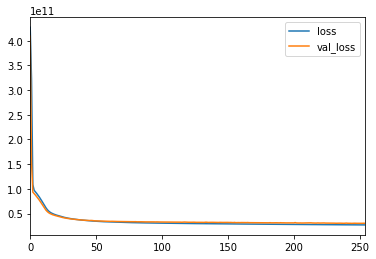

In [86]:
model_loss.plot()

In [87]:
model.evaluate(x=X_test,y=y_test)

135/135 [==============================] - 0s 841us/step - loss: 30236622848.0000


30236622848.0

In [89]:
predict = model.predict(X_test)

In [90]:
predict

array([[179514.23],
       [954162.75],
       [477882.25],
       ...,
       [333670.84],
       [500002.53],
       [367554.3 ]], dtype=float32)

In [91]:
y_test.shape

(4320,)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [93]:
mean_absolute_error(y_test,predict)

103464.36801938657

In [94]:
mean_squared_error(y_test,predict)**0.5

173886.80908486

In [96]:
explained_variance_score(y_test,predict)

0.766682964117573

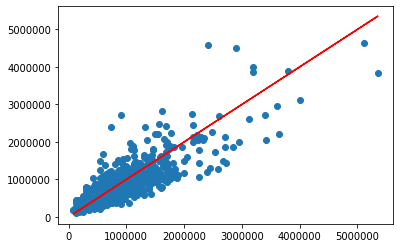

In [101]:
plt.scatter(y_test,predict)
plt.plot(y_test,y_test,'r')

In [102]:
model.save('price_model.h5')

In [103]:
from tensorflow.keras.models import load_model

In [104]:
loaded_model = load_model('price_model.h5')

In [183]:
data = [3.000,1.000,1180.000,5650.000,1.000,0.000,0.000,3.000,7.000,1180.000,1955,47.5112,-122.257,1340,5650,2014,10,0,0]

In [184]:
data

[3.0,
 1.0,
 1180.0,
 5650.0,
 1.0,
 0.0,
 0.0,
 3.0,
 7.0,
 1180.0,
 1955,
 47.5112,
 -122.257,
 1340,
 5650,
 2014,
 10,
 0,
 0]

In [185]:
dataa = np.array(data)

In [186]:
dataa

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  1.95500e+03,  4.75112e+01,
       -1.22257e+02,  1.34000e+03,  5.65000e+03,  2.01400e+03,
        1.00000e+01,  0.00000e+00,  0.00000e+00])

In [187]:
single_house = np.array([data])

In [188]:
single_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  1.95500e+03,  4.75112e+01,
        -1.22257e+02,  1.34000e+03,  5.65000e+03,  2.01400e+03,
         1.00000e+01,  0.00000e+00,  0.00000e+00]])

In [189]:
single_housee = scaler.transform(single_house)

In [190]:
loaded_model.predict(single_housee)

array([[271589.3]], dtype=float32)

In [181]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,year,month,yr_renovated_changed,sqft_basement_changed
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,47.5112,-122.257,1340,5650,2014,10,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,47.7210,-122.319,1690,7639,2014,12,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,47.7379,-122.233,2720,8062,2015,2,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,47.5208,-122.393,1360,5000,2014,12,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,47.6168,-122.045,1800,7503,2015,2,0,0


In [111]:
single_house_data = df.drop('price',axis=1)

In [113]:
single_house_data = single_house_data.iloc[0]

In [114]:
single_house_data

bedrooms                    3.0000
bathrooms                   1.0000
sqft_living              1180.0000
sqft_lot                 5650.0000
floors                      1.0000
waterfront                  0.0000
view                        0.0000
condition                   3.0000
grade                       7.0000
sqft_above               1180.0000
yr_built                 1955.0000
lat                        47.5112
long                     -122.2570
sqft_living15            1340.0000
sqft_lot15               5650.0000
year                     2014.0000
month                      10.0000
yr_renovated_changed        0.0000
sqft_basement_changed       0.0000
Name: 0, dtype: float64

In [119]:
single_house_data = single_house_data.values

In [120]:
single_house_data

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  1.95500e+03,  4.75112e+01,
       -1.22257e+02,  1.34000e+03,  5.65000e+03,  2.01400e+03,
        1.00000e+01,  0.00000e+00,  0.00000e+00])

In [140]:
#scaler.transfrom() expects 2d array data so conveting 1d array single_house_data to 2d array data(single_house_dataa)
single_house_dataa = np.array([single_house_data])

In [141]:
single_house_dataa

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  1.95500e+03,  4.75112e+01,
        -1.22257e+02,  1.34000e+03,  5.65000e+03,  2.01400e+03,
         1.00000e+01,  0.00000e+00,  0.00000e+00]])

In [142]:
scale = scaler.transform(single_house_dataa)

In [143]:
model.predict(scale)

array([[271589.3]], dtype=float32)

In [144]:
loaded_model.predict(scale)

array([[271589.3]], dtype=float32)

In [171]:
model.predict(single_housee)

array([[101281.164]], dtype=float32)

In [182]:
single_housee == scale

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True]])